<a href="https://colab.research.google.com/github/Sculllian07/Xebia-Mini-Project/blob/main/job_recommendation_sample1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Skill-Based Job Recommendation System
This notebook recommends jobs based on your resume using AI (TF-IDF + Cosine Similarity).

In [ ]:
#G4 Swastik | Pranav

In [ ]:
#Day 1 work  (25-06-25)

In [ ]:
!pip install nltk scikit-learn pandas matplotlib


In [ ]:
from google.colab import files
uploaded = files.upload()
#3 files generated from ChatGPT and later edited(contents + column header) by me

Saving jobs.csv to jobs.csv
Saving resume.txt to resume.txt
Saving skills.csv to skills.csv


In [ ]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords  #ignores useless words (like is, there, the etc)
from nltk.stem import PorterStemmer  #Used to return root word (eg. Running = run)
import pandas as pd

stop_words = set(stopwords.words('english'))
stemmer = PorterStemmer()

def preprocess(text):
    words = text.lower().split()
    filtered = [stemmer.stem(word) for word in words if word not in stop_words]
    return " ".join(filtered)


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
job_df = pd.read_csv("jobs.csv")
skill_df = pd.read_csv("skills.csv")
job_df['Processed'] = job_df['Description'].apply(preprocess)


In [ ]:
with open("resume.txt", "r") as file:
    resume_text = file.read()

processed_resume = preprocess(resume_text)


In [ ]:
#From Stack overflow + Chatgpt

from sklearn.feature_extraction.text import TfidfVectorizer #job descriptions + resume in numeric vectors
from sklearn.metrics.pairwise import cosine_similarity

corpus = job_df['Processed'].tolist() + [processed_resume]
vectorizer = TfidfVectorizer()
vectors = vectorizer.fit_transform(corpus)

similarity_scores = cosine_similarity(vectors[-1], vectors[:-1]).flatten()
job_df['Score'] = similarity_scores


In [ ]:
top_jobs = job_df.sort_values(by='Score', ascending=False).head(5)
print(top_jobs[['Job Title', 'Score']])


           Job Title     Score
0      Web Developer  0.289748
1       Data Analyst  0.289314
2  Software Engineer  0.119714
4    DevOps Engineer  0.035053
3    Project Manager  0.017807


In [ ]:
resume_words = set(processed_resume.split())

print("\nSkill Recommendations:")
for job in top_jobs['Job Title']:
    skills = skill_df[skill_df['Job Title'] == job]['Skills'].values
    if len(skills) == 0:
        continue
    skill_list = [s.strip().lower() for s in skills[0].split(',')]
    missing = [s for s in skill_list if stemmer.stem(s) not in resume_words]
    print(f"\n🔹 For Job: {job}\n    Missing Skills: {missing[:5]}")



Skill Recommendations:

🔹 For Job: Web Developer
    Missing Skills: ['html', 'css', 'javascript']

🔹 For Job: Data Analyst
    Missing Skills: ['python', 'pandas', 'matplotlib']

🔹 For Job: Software Engineer
    Missing Skills: ['java', 'c++', 'algorithms', 'data structures', 'unit testing']

🔹 For Job: DevOps Engineer
    Missing Skills: ['aws', 'docker', 'kubernetes', 'ci/cd']

🔹 For Job: Project Manager
    Missing Skills: ['agile', 'jira', 'team leadership', 'stakeholder communication']


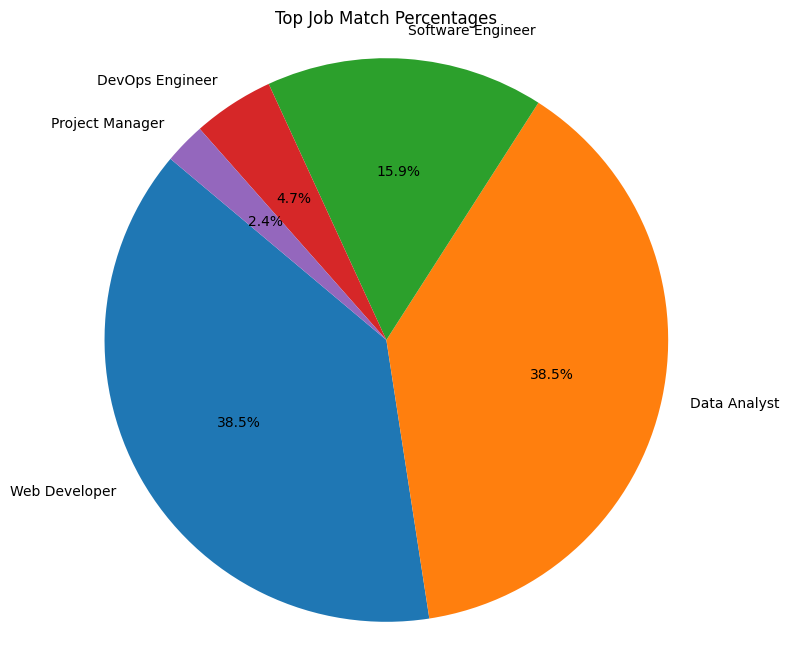

In [ ]:
#learnt data visualization during Xebia class

import matplotlib.pyplot as plt
labels = top_jobs['Job Title']
scores = top_jobs['Score']
plt.figure(figsize=(8, 8))
plt.pie(scores, labels=labels, autopct='%1.1f%%', startangle=140)
plt.title('Top Job Match Percentages')
plt.axis('equal')
plt.show()

In [ ]:
import numpy as np

# Final line to print most suitable job(s) using proper grammar
top_score = top_jobs['Score'].max()
best_jobs = top_jobs[np.isclose(top_jobs['Score'], top_score)]['Job Title'].tolist()

if len(best_jobs) == 1:
    print(f"Most suitable job for you is: {best_jobs[0]}")
else:
    joined_jobs = " or ".join(best_jobs)
    print(f"Most suitable job for you is: {joined_jobs}")


Most suitable job for you is: Web Developer


In [ ]:
#Day 2 work (26-06-25)

In [ ]:
#Now working with large dataset.
#Source: College  |||   Might change later

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving jobMRU.csv to jobMRU.csv


In [ ]:
import pandas as pd

df = pd.read_csv("jobMRU.csv")
df.head()


,S.No.,Title,Company Name,Package,Job sector,Package Interval,CTC Currency,Years,Stage 1,Stage 2,Stage 3,Stage 4,Stage 5,Stage 6,Education criteria
0,1.0,GRADUATE ENGINEER TRAINEE,Coforge,425000.0,ENGINEERING_WEB_SOFTWARE,ANNUM,INR,2024,Online test,Technical interview,HR interview,-,-,-,B.Tech\r\n\tApplicants must have scored\r\n\t\...
1,2.0,Business Analyst (Intern) (for 2025 batch),Kreative Kode,35000.0,OTHER,MONTH,INR,2024,Technical interview (0),HR interview (0),-,-,-,-,MBA (Semester)\r\n\tApplicants must have score...
2,3.0,Research Analyst (Intern),Kreative Kode,22000.0,OTHER,MONTH,INR,2024,Technical interview (0),HR interview (0),-,-,-,-,B.Tech\r\n\tApplicants must have scored\r\n\t\...
3,4.0,GRADUATE ENGINEER TRAINEE,Watchguard Technologies India Pvt Limited,943556.0,ENGINEERING_WEB_SOFTWARE,ANNUM,INR,2024,Pre-placement Talk (0),Technical interview (0),HR interview (0),-,-,-,B.Tech\r\n\tApplicants must have scored\r\n\t\...
4,5.0,Summer Intern (2025 batch),Beyond Finance,40000.0,OTHER,MONTH,INR,2024,Resume shortlisting (0),Technical interview (0),HR interview (0),-,-,-,B.Tech\r\n\tAll students of B.Tech are eligibl...


In [ ]:
# Clean essential columns
df.dropna(subset=["Title", "Company Name", "Job sector"], inplace=True)
df["Title"] = df["Title"].str.lower().str.strip()
df["Job sector"] = df["Job sector"].str.lower().str.strip()

df["job_desc"] = (
    df["Title"].fillna("") + " " +
    df["Job sector"].fillna("") + " " +
    df.get("Education criteria", "").fillna("")
)

In [ ]:
uploaded_resume = files.upload()
resume_path = list(uploaded_resume.keys())[0]


Saving RESUMEFINAL.pdf to RESUMEFINAL.pdf


In [ ]:
!pip install pdfminer.six

from pdfminer.high_level import extract_text
resume_text = extract_text(resume_path)
print(resume_text[:3000])  # Print first 3000 characters


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 39.0 MB/s eta 0:00:00
Swastik Praharaj 

A budding engineer with proactive mindset, seeking to leverage existing skills along with strong problem-solving skills 
developed through solving complex problems, combined with determination and a passion for tackling challenging 
technical tasks and achieving success 

Email: swastikpraharaj5@gmail.com 
Location: South Delhi, Delhi 
LinkedIn: www.linkedincom/in/swastik07/ 

Contact No: +91-8373903699 
Date of Birth: 06 February, 2005 
Github: https://github.com/Sculllian07 

EDUCATION 
Graduation 
(B.TECH CSE specialization Artificial 
Intelligence and Machine Learning) 
Manav Rachna University, Faridabad 
2022-2026 | SGPA 7.18 

Senior Secondary (12th Std) 
Tagore International School, CBSE, Eok, Delhi 
2022 | 66% 

Secondary (10th Std) 
Tagore International School, CBSE, EoK, Delhi 
2020 | 72% 

INTERNSHIPS 
Codsoft  Artificial Intelligence (Intern) 
10 Jun-10 Jul 2024 

•  Developed  a

In [ ]:
!pip install spacy
!python -m spacy download en_core_web_sm

import spacy
nlp = spacy.load("en_core_web_sm")

doc = nlp(resume_text)
# Extract only nouns, proper nouns, and adjectives
resume_tokens = [token.text.lower() for token in doc if token.pos_ in ["NOUN", "PROPN", "ADJ"] and not token.is_stop]
resume_tokens = list(set(resume_tokens))

# (Optional) Filter using a known skills list for better results
common_skills = [
    "python", "java", "sql", "excel", "tableau", "powerbi",
    "machine learning", "deep learning", "nlp", "data science",
    "tensorflow", "keras", "pandas", "numpy", "flask", "django"
]

resume_keywords = [word for word in resume_tokens if word in common_skills]
print("Extracted Resume Skills:\n", resume_keywords)


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 34.6 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.
Extracted Resume Skills:
 ['java', 'python']


In [ ]:
# STEP 5: TF-IDF Matching and Recommendation
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

# Vectorize the job descriptions
vectorizer = TfidfVectorizer()
tfidf_matrix = vectorizer.fit_transform(df["job_desc"])

# Vectorize the resume keywords
resume_query = " ".join(resume_keywords)
resume_vector = vectorizer.transform([resume_query])

# Calculate similarity scores
similarities = cosine_similarity(resume_vector, tfidf_matrix).flatten()

# Get top 5 matching jobs
top_indices = similarities.argsort()[-5:][::-1]
recommended_jobs = df.iloc[top_indices][["Title", "Company Name", "Job sector", "Package"]]

# Display recommendations
print("\nTop 5 Recommended Jobs Based on Resume:\n")

for i, row in recommended_jobs.iterrows():
    print(f"    Job Title: {row['Title'].title()}")
    print(f"    Company: {row['Company Name']}")
    print(f"    Sector: {row['Job sector'].replace('_', ' ').title()}")
    print(f"    Package: ₹ {int(row['Package']):,} per annum\n")



Top 5 Recommended Jobs Based on Resume:

    Job Title: Junior Software Developer -Python
    Company: Crosslynx Technologies Services Pvt. Ltd.
    Sector: Engineering Web Software
    Package: ₹ 500,000 per annum

    Job Title: (Frontend/Full Stack/ Java & Python) Developer
    Company: Prodesk IT
    Sector: Engineering Web Software
    Package: ₹ 320,000 per annum

    Job Title: (Data And Java) Intern
    Company: Xebia
    Sector: Engineering Web Software
    Package: ₹ 300,000 per annum

    Job Title: Intern (Trainee Java)
    Company: World Phone IT Services
    Sector: Engineering Web Software
    Package: ₹ 300,000 per annum

    Job Title: React Developer Intern, Java Developer Intern, Project Management Intern
    Company: Diatoz
    Sector: Engineering
    Package: ₹ 300,000 per annum



In [ ]:
#in total 1386 records for jobs. Yet to finalize the dataset

In [ ]:
#training with another dataset
#
#

In [ ]:
#using a job dataset and resume dataset sourced from internet, College dataset on hold for now

In [17]:
from google.colab import files
uploaded = files.upload()


Saving resume_data.csv to resume_data.csv


In [1]:
from google.colab import files
uploaded = files.upload()


Saving jobs.csv to jobs.csv


In [2]:
import pandas as pd

resume_df = pd.read_csv('resume_data.csv')
jobs_df = pd.read_csv('jobs.csv')

print("Resume columns:", resume_df.columns.tolist())
print("Jobs columns:", jobs_df.columns.tolist())


Resume columns: ['address', 'career_objective', 'skills', 'educational_institution_name', 'degree_names', 'passing_years', 'educational_results', 'result_types', 'major_field_of_studies', 'professional_company_names', 'company_urls', 'start_dates', 'end_dates', 'related_skils_in_job', 'positions', 'locations', 'responsibilities', 'extra_curricular_activity_types', 'extra_curricular_organization_names', 'extra_curricular_organization_links', 'role_positions', 'languages', 'proficiency_levels', 'certification_providers', 'certification_skills', 'online_links', 'issue_dates', 'expiry_dates', '\ufeffjob_position_name', 'educationaL_requirements', 'experiencere_requirement', 'age_requirement', 'responsibilities.1', 'skills_required', 'matched_score']
Jobs columns: ['Unnamed: 0', 'Job Salary', 'Job Experience Required', 'Key Skills', 'Role Category', 'Functional Area', 'Industry', 'Job Title']


In [3]:
resume_df['skills'] = resume_df['skills'].fillna('')
resume_df['career_objective'] = resume_df['career_objective'].fillna('')
resume_df['major_field_of_studies'] = resume_df['major_field_of_studies'].fillna('')
resume_df['role_positions'] = resume_df['role_positions'].fillna('')

jobs_df['Key Skills'] = jobs_df['Key Skills'].fillna('')
jobs_df['Job Title'] = jobs_df['Job Title'].fillna('')
jobs_df['Functional Area'] = jobs_df['Functional Area'].fillna('')

resume_df['full_resume_text'] = (
    resume_df['skills'] + ' ' +
    resume_df['career_objective'] + ' ' +
    resume_df['major_field_of_studies'] + ' ' +
    resume_df['role_positions']
)

jobs_df['full_job_text'] = (
    jobs_df['Key Skills'] + ' ' +
    jobs_df['Job Title'] + ' ' +
    jobs_df['Functional Area']
)


In [4]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

combined = pd.concat([resume_df['full_resume_text'], jobs_df['full_job_text']], axis=0)

vectorizer = TfidfVectorizer()
tfidf_matrix = vectorizer.fit_transform(combined)

resume_vectors = tfidf_matrix[:len(resume_df)]
job_vectors = tfidf_matrix[len(resume_df):]

similarity = cosine_similarity(resume_vectors, job_vectors)
best_matches = similarity.argmax(axis=1)


In [5]:
resume_df['recommended_job_index'] = best_matches
resume_df['recommended_job_title'] = resume_df['recommended_job_index'].apply(lambda i: jobs_df.iloc[i]['Job Title'])

resume_df[['﻿job_position_name', 'recommended_job_title']].head()


,﻿job_position_name,recommended_job_title
0,Senior Software Engineer,Roles and responsibilities Functional Respons...
1,Machine Learning (ML) Engineer,Data Analyst
2,"Executive/ Senior Executive- Trade Marketing, ...",Technical Architect
3,Business Development Executive,Accounts Executive/Accountant
4,Senior iOS Engineer,Accounts Executive/Accountant


from matplotlib import pyplot as plt
_df_0['index'].plot(kind='hist', bins=20, title='index')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_1.groupby('\ufeffjob_position_name').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_2.groupby('recommended_job_title').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['index']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'index'}, axis=1)
              .sort_values('index', ascending=True))
  xs = counted['index']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_3.sort_values('index', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('\ufeffjob_position_name')):
  _plot_series(series, series_name, i)
  fig.legend(title='\ufeffjob_position_name', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['index']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'index'}, axis=1)
              .sort_values('index', ascending=True))
  xs = counted['index']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_4.sort_values('index', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('recommended_job_title')):
  _plot_series(series, series_name, i)
  fig.legend(title='recommended_job_title', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
_df_5['index'].plot(kind='line', figsize=(8, 4), title='index')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['recommended_job_title'].value_counts()
    for x_label, grp in _df_6.groupby('\ufeffjob_position_name')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('\ufeffjob_position_name')
_ = plt.ylabel('recommended_job_title')

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_7['\ufeffjob_position_name'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_7, x='index', y='\ufeffjob_position_name', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_8['recommended_job_title'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_8, x='index', y='recommended_job_title', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

In [6]:
resume_df.to_csv("resume_with_recommendations.csv", index=False)
files.download("resume_with_recommendations.csv")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>